# Import Data

In [20]:
import pandas as pd
import cvxpy as cp
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
#import gdown

Создаем DataFrame data, передаем в него имеющиеся данные, дополняем данными sales и cum_sum.
Выводим полученный data

In [21]:
data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
                     'generate': [8.26192344363636, 9.20460066059596, 12.0178164697778, 15.921260267805, 21.2161740066094, 31.420434564131, 38.3904519471421, 52.3307819867071, 62.9113953016839, 85.1161924282732, 104.083879757882, 132.859216030029, 170.682620580279, 220.600045153997, 276.020526299077, 346.465021938078, 440.385091980306, 530.55442135112, 635.49205101167, 705.805860788812, 831.42968828187, 962.227395409379, 1140.31094904253, 1269.52053571083, 1418.17004626655, 1591.2135122193]})
data['sales'] = [0]+[data['generate'][i+1]-data['generate'][i] for i in range(data.shape[0]-1)]
data['cum_sum'] = data['generate'].cumsum()
data

,year,generate,sales,cum_sum
0,1995,8.261923,0.000000,8.261923
1,1996,9.204601,0.942677,17.466524
2,1997,12.017816,2.813216,29.484341
3,1998,15.921260,3.903444,45.405601
4,1999,21.216174,5.294914,66.621775
5,2000,31.420435,10.204261,98.042209
6,2001,38.390452,6.970017,136.432661
7,2002,52.330782,13.940330,188.763443
8,2003,62.911395,10.580613,251.674839
9,2004,85.116192,22.204797,336.791031


Создаем переменные P, Q, M, и назначаем им скорректированные данные из excel

In [22]:
P = 0.000572585
Q = 0.249521952
M = 2407.094319

Создаем функцию bass

In [23]:
def bass(x):
    # return (P+(Q/M)*(x))*(M-x)
    return P*M+(Q-P)*(x)-(Q/M)*(x**2)

создаем функцию progcum, которая возвращает список спрогнозированных значений на основе формулы Басса, 
в которой первое значение берем от реально сгенерированных данных, остальные на основе предыдущего предсказания

In [24]:
def progcum(gen):
    a = [gen[0]]
    for i in range(1, len(gen)):
        a.append((bass(a[i-1]))+a[i-1])
    return a

передаем эти данные в DataFrame и выводим его

In [25]:
data['ProgCumul'] = progcum(data['generate'])
data

,year,generate,sales,cum_sum,ProgCumul
0,1995,8.261923,0.000000,8.261923,8.261923
1,1996,9.204601,0.942677,17.466524,11.689914
2,1997,12.017816,2.813216,29.484341,15.964211
3,1998,15.921260,3.903444,45.405601,21.290339
4,1999,21.216174,5.294914,66.621775,27.921835
5,2000,31.420435,10.204261,98.042209,36.170406
6,2001,38.390452,6.970017,136.432661,46.417653
7,2002,52.330782,13.940330,188.763443,59.128216
8,2003,62.911395,10.580613,251.674839,74.864000
9,2004,85.116192,22.204797,336.791031,94.298631


Полученные данные соответсвуюх excel файлу, создадим функцию вывода данных в график и выведем полученные графики

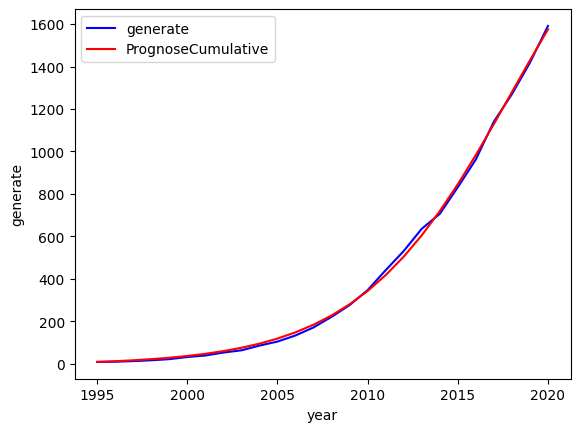

In [26]:
def grafik(a = data.ProgCumul):
    plt.plot(data.year, data.generate, 'b-', label='generate')
    plt.plot(data.year, a, 'r-', label='PrognoseCumulative')
    plt.xlabel('year')
    plt.ylabel('generate')
    plt.legend()
    plt.show()
grafik()

сгенерируем параметры P,Q,M через модуль scypy и выведем полученные данные в график,
прелыдущие P,Q,M сохраним в переменную, что бы сравнивать

In [27]:
def bass2(x, p, q, m):
    # return (p+(q/m)*(x))*(m-x)
    return (p*m+(q-p)*(x))-(q/m)*(x**2)
# popt, pcov = curve_fit(bass2, data.cum_sum[0:26], data.generate[0:26], maxfev = 5000)
popt, pcov = curve_fit(bass2, data.cum_sum[1:23], data.generate[1:23], maxfev = 5000)

PQM = [P, Q, M]
print(f'P - {round(popt[0],5)}, Q - {round(popt[1],5)}, M - {round(popt[2],5)}')
print(f'P - {round(P,5)}, Q - {round(Q,5)}, M - {round(M,5)}')

P - 0.00044, Q - 0.21799, M - 26421.35666
P - 0.00057, Q - 0.24952, M - 2407.09432


Из полученных данных видно, что не соответствует только параметр M. При этом, если используем все данные (25 значений), то появляются отрицательные значения.
Перепишем DataFrame на основе новых данных и выведем в график

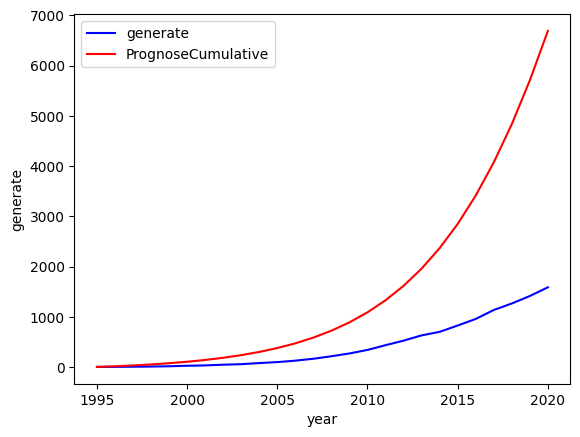

In [28]:
P = popt[0]
Q = popt[1]
M = popt[2]
data['ProgCumul1'] = progcum(data['generate'])
grafik(data.ProgCumul1)

проверим, что получится если сгенерировать P, Q, M на основе сгенерированных данных и года генерации

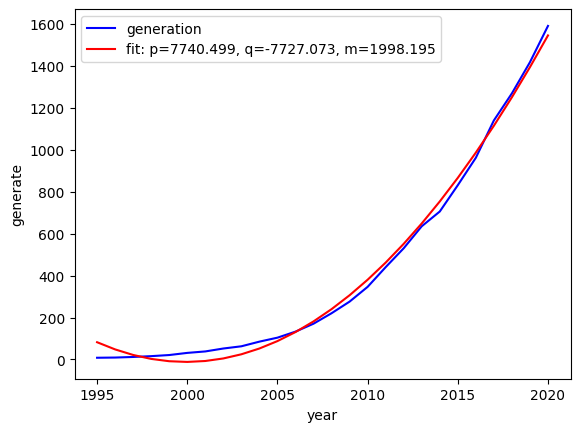

In [29]:
plt.plot(data.year, data.generate, 'b-', label='generation')

popt, pcov = curve_fit(bass2, data.year, data.generate, maxfev = 10000)
plt.plot(data.year, bass2(data.year, *popt), 'r-',
         label='fit: p=%5.3f, q=%5.3f, m=%5.3f' % tuple(popt))
plt.xlabel('year')
plt.ylabel('generate')
plt.legend()
plt.show()

Функцию почти получилось притянуть к данным, но несоответствие в самом начале графика, да и параметры p,q,m (отображены на графике) далеки от тех что высчитываем в excel

Можно попробовать использовать библиотеку CVXPY (https://www.cvxpy.org/tutorial/intro/index.html)
Судя по статье (https://www.solvermax.com/blog/optimization-in-excel-vs-python), значения получаются идентичными excel.
Но тут мне уже не хватает математики, или не хватает понимания работы с данной библиотекой

Определяем 3 переменные 

In [30]:
P1 = cp.Variable()
Q1 = cp.Variable()
M1 = cp.Variable()

В описании библиотеки указано, что она работает с массивами numpy, передадим значения времени и генерации из нашего датафрэйма

In [31]:
generateN = np.array(data.generate)
yearN = np.array(data.year)
yearN
# generateN


array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020], dtype=int64)

Теперь заполним Prognose "Sales" и Prognose Cumulative.
Создаем функцию в которую передаём данные генерации и выводим 2 списка, которые сразу присваиваем переменным переменным numpy

In [32]:
# def sale_cum(year):
    # s = [0]
    # c = [gen[0]]
    # for i in range(1, len(gen)-1):
    #     s.append(bass2(c[-1], P1, Q1, M1))
    #     # s.append(bass(c[-1]))
    #     c.append(c[i-1]+s[i])

    # return (bass2(i, P1, Q1, M1) for i in year)
# print(sale_cum(data.generate))

# len(data.generate)
# progsalN = np.array(list(sale_cum(generateN)))
progsalN = np.array([bass2(i, P1, Q1, M1) for i in yearN])
# progcumN = np.array([sale_cum(generareN)[1]])
# print(len(progsalN))
# print(len(generateN))
progsalN

array([Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ()),
       Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ()),
       Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ()),
       Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ()),
       Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ()),
       Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ()),
       Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ()),
       Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ()),
       Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ()),
       Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ()),
       Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ()),
       Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ()),
       Expression(UNKNOWN, UNKNOWN, ()), Expression(UNKNOWN, UNKNOWN, ())],
      dtype=object)

Далее создаем objective

In [33]:
objective = cp.Minimize(cp.sum_squares(progsalN - generateN))
# obj = cp.Minimize((progsalN - generateN)**2)

ValueError: setting an array element with a sequence.

Укажем что параметры P, Q, M должны быть больше 0

In [ ]:
constraints = [P1 >= 0, Q1 >= 0, M1 >= 0]

Сформулируем и решим проблему

In [ ]:
prob = cp.Problem(objective, constraints)
result = prob.solve()
print(P1.value)
print(Q1.value)
print(M1.value)

NameError: name 'objective' is not defined

In [ ]:
def squaremist(a, b):
    c = []
    for i in range(len(a)):
        c.append((b[i]-a[i])**2)
    return(sum(c))
# squaremist(data['generate'], data['ProgCumul'])

# objective = cp.Minimize(cp.sum(squaremist(data['generate'], progcum(data['generate']))))
# constraints = [P >= 0, Q >= 0, M >= 0]
# prob = cp.Problem(objective)
# result = prob.solve()
# print(P.value)
# print(Q.value)
# print(M.value)
# print(objective)

4722.497140329559